## Homework 4

#### Qingwen Wang

Use the classify_imb.csv  downloadfile in the Files tab. Build a classifier to predict the Target column using the other 20 features. 

When you split your data into training and test sets, set random_state = 5. Try a random forest (use random_state = 5 and cross validate the number of trees), boosting (use n_estimators = 300, learning rate =0.1, and max_depth =3), and a logistic regression classifier. Which is best? How can you tell? Comment on the precision, recall, and accuracy of your model.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
classify=pd.read_csv('classify_imb.csv')
classify.head()

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,Target
0,2.868690,-0.106937,1.065444,0.749917,2.138981,-0.267874,-4.287288,-0.003229,0.102618,-1.594098,...,-0.031744,-1.836612,2.508588,2.123112,-1.599241,0.944821,0.330276,1.017247,-0.440207,0
1,-1.463642,-1.291157,-1.464761,1.287344,-1.994637,0.831797,0.130555,-0.555585,-1.746450,0.320191,...,-0.948864,0.497305,2.651037,1.722998,0.290210,-1.278545,0.488835,1.577497,-1.097335,1
2,-2.208983,1.112905,1.484842,1.455104,-0.380712,-0.465900,3.464477,1.561576,-0.972615,2.646365,...,0.571619,-0.573899,-4.393691,-3.936344,5.499447,0.874778,-0.858103,-1.040617,-2.759917,0
3,1.757493,-0.194035,-1.502209,-1.227620,-1.629453,2.192913,-0.774430,-1.284792,0.433154,2.233775,...,0.089484,-2.290146,-2.274138,-3.454273,-0.904307,0.459121,-0.043155,-2.129675,-0.559314,0
4,-0.621503,-1.709654,-2.155096,-1.982270,-1.205284,-0.285097,-1.279000,-3.831940,-1.205034,-4.213100,...,0.808936,0.647993,4.629954,3.860843,-1.288296,0.992935,1.069965,3.676966,1.005724,0


<AxesSubplot:>

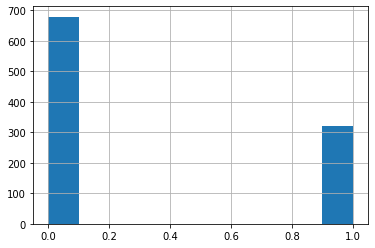

In [5]:
classify.Target.hist()

In [48]:
1 - sum(classify.Target)/len(classify.Target)

0.679

In [6]:
X=classify.drop('Target',axis=1)
y=classify['Target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)
print(sum(y_train)/len(y_train),":",sum(y_test)/len(y_test))

0.3157142857142857 : 0.3333333333333333


Since this is an imblanced dataset, we can fisrt create more virtual obsverations to balance the dataset.

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE

In [34]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train, y_train)

In [35]:
np.sum(ys)/len(ys)

0.5

#### Random Forest

In [3]:
from tqdm import tqdm

In [5]:
num_trees=[600,700,800,900,1000,1100,1200]
cvres=[]
for num in tqdm(num_trees):
    rf_cv_clf = RandomForestClassifier(n_estimators = num, max_features='sqrt',random_state=5)
    cvclf = cross_validate(rf_cv_clf, Xs, ys, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())

  0%|          | 0/7 [00:00<?, ?it/s]


NameError: name 'RandomForestClassifier' is not defined

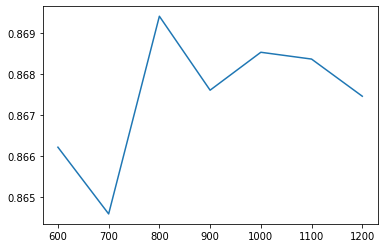

In [39]:
plt.plot(num_trees,cvres)

In [40]:
rfc=RandomForestClassifier(n_estimators = 800, max_features='sqrt',random_state=0).fit(Xs,ys)

In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
f1_score(y_test,rfc.predict(X_test))

0.6217616580310881

In [43]:
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       200
           1       0.65      0.60      0.62       100

    accuracy                           0.76       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.75      0.76      0.75       300



Random forest:<br>
F1 score is 0.62, precision = 0.65, recall = 0.60, accurancy = 0.76<br>
It's like 65% of what we predict is Class 1 is actually belongs to Class 1;<br>
and we find out 60% of Class 1;<br>
accurany is better than a navie guess, but still not a good performance.

#### Boosting

In [44]:
bs_clf = GradientBoostingClassifier(n_estimators=300,max_depth=3,learning_rate=0.1,random_state=5).fit(Xs,ys)

In [45]:
f1_score(y_test,bs_clf.predict(X_test))

0.64

In [46]:
print(classification_report(y_test,bs_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       200
           1       0.64      0.64      0.64       100

    accuracy                           0.76       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.76      0.76      0.76       300



Boosting:<br>
F1 score is 0.64, precision = 0.64, recall = 0.64, accurancy = 0.76.<br>
It's like 64% of what we predict is Class 1 is actually belongs to Class 1;<br>
and we find out 64% of Class 1;<br>
accurany is better than a navie guess, but still not a good performance.

#### Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [101]:
lr = LogisticRegression().fit(X_train, y_train)

In [102]:
lr.score(X_test,y_test)

0.6833333333333333

In [103]:
f1_score(y_test,lr.predict(X_test))

0.18803418803418803

In [104]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.97      0.80       200
           1       0.65      0.11      0.19       100

    accuracy                           0.68       300
   macro avg       0.67      0.54      0.50       300
weighted avg       0.67      0.68      0.60       300



logistic regression:<br>
accurancy  = 0.68, just a navie guess can also have this result.So it is bad.<br>
preciscion 0.65, just ok; but recall is only 0.11, very low.<br>

change the thresold to see if can get a better prediction:

In [147]:
new_lr_pred = lr.predict_proba(X_test)[:,1] > 0.3

In [148]:
print(classification_report(y_test,new_lr_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       200
           1       0.40      0.63      0.49       100

    accuracy                           0.56       300
   macro avg       0.57      0.57      0.55       300
weighted avg       0.62      0.56      0.57       300



logistic regression with threshold = 0.3: <br>
accurancy  = 0.56, it's not good<br>
However the preciscion and recall score goes up.<br>

So, the best one is Boosting <br>
F1 score is 0.64, precision = 0.64, recall = 0.64, accurancy = 0.76.<br>
But, to choose the most suitable model, usually it is based on the content, wheather we need a higher precision or recall; in this case, since we have no knowledge of content, so i just choose the model which has the best f1 score and accurancy.<br>